In [1]:
import cartopy.crs as ccrs
import cartopy
import datetime as dt
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import netCDF4
import numpy as np
import os
import imageio
import glob

In [2]:
exp_dir = '/glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021'

 Reading /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/jedi_letkf_out_obs_depth_2021-03-01T00:00:00Z_0000.nc
Plotted data statistics: 
Mean:  0.35957315340638163
Standard deviation:  0.17887481653443227
Minimum  0.0
Maximum:  0.8022838234901428
Using user provided minimum for colorbar
Using user provided maximum for colorbar
 Saving figure as ./pngs/hX_March21_2021-03-01T00:00:00.png 



/glade/u/home/afox/.conda/envs/xr/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Warning: converting a masked element to nan.
/glade/u/home/afox/.conda/envs/xr/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in less


 Reading /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/jedi_letkf_out_obs_depth_2021-03-02T00:00:00Z_0000.nc
Plotted data statistics: 
Mean:  0.8795461021693407
Standard deviation:  0.2346080526231576
Minimum  0.0
Maximum:  1.4634422063827515
Using user provided minimum for colorbar
Using user provided maximum for colorbar
 Saving figure as ./pngs/hX_March21_2021-03-02T00:00:00.png 

 Reading /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/jedi_letkf_out_obs_depth_2021-03-03T00:00:00Z_0000.nc
Plotted data statistics: 
Mean:  0.9386683447493447
Standard deviation:  0.26403824345695487
Minimum  0.0
Maximum:  1.648043155670166
Using user provided minimum for colorbar
Using user provided maximum for colorbar
 Saving figure as ./pngs/hX_March21_2021-03-03T00:00:00.png 

 Reading /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/jedi_letkf_out_obs_depth_2021-03-04T00:00:00Z_0000.nc
Plotted data statistics: 
Mean:  0.9469621

/glade/u/home/afox/.conda/envs/xr/lib/python3.7/site-packages/ipykernel_launcher.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


 Reading /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/jedi_letkf_out_obs_depth_2021-03-22T00:00:00Z_0000.nc
Plotted data statistics: 
Mean:  1.0721739456639625
Standard deviation:  0.4582951096041837
Minimum  0.0
Maximum:  2.0516796112060547
Using user provided minimum for colorbar
Using user provided maximum for colorbar
 Saving figure as ./pngs/hX_March21_2021-03-22T00:00:00.png 

 Reading /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/jedi_letkf_out_obs_depth_2021-03-23T00:00:00Z_0000.nc
Plotted data statistics: 
Mean:  1.1919840667219388
Standard deviation:  0.3813399910908264
Minimum  0.0002707168459892273
Maximum:  2.0724663734436035
Using user provided minimum for colorbar
Using user provided maximum for colorbar
 Saving figure as ./pngs/hX_March21_2021-03-23T00:00:00.png 

 Reading /glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/jedi_letkf_out_obs_depth_2021-03-24T00:00:00Z_0000.nc
Plotted data statistics:

FileNotFoundError: [Errno 2] No such file or directory: b'/glade/u/home/afox/work/jedi/Jedi_experiments/workflow/expts/march_021/jedi_letkf_out_obs_depth_2021-03-31T00:00:00Z_0000.nc'

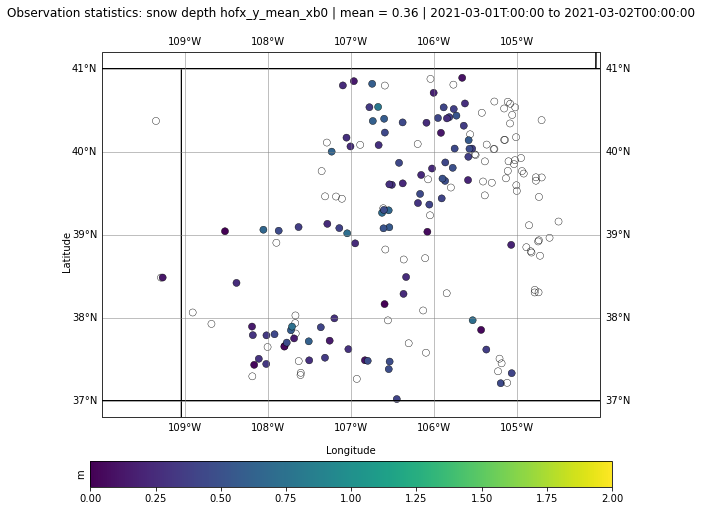

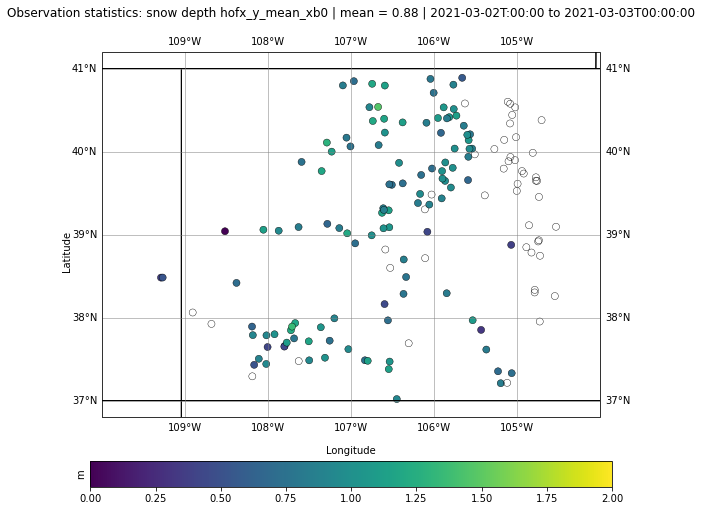

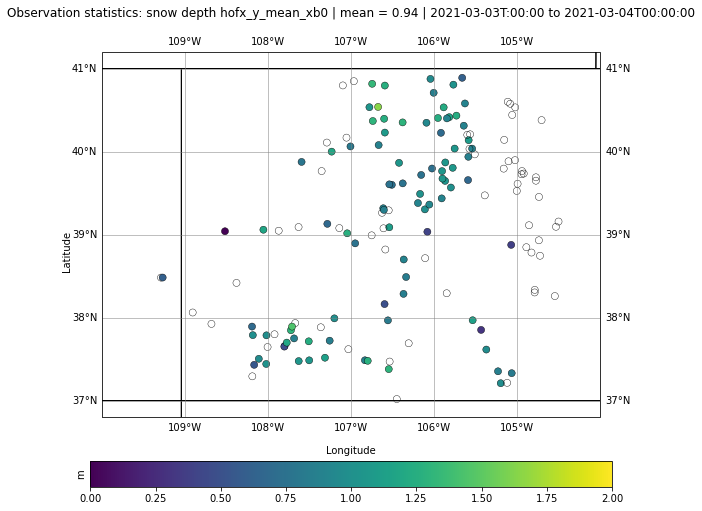

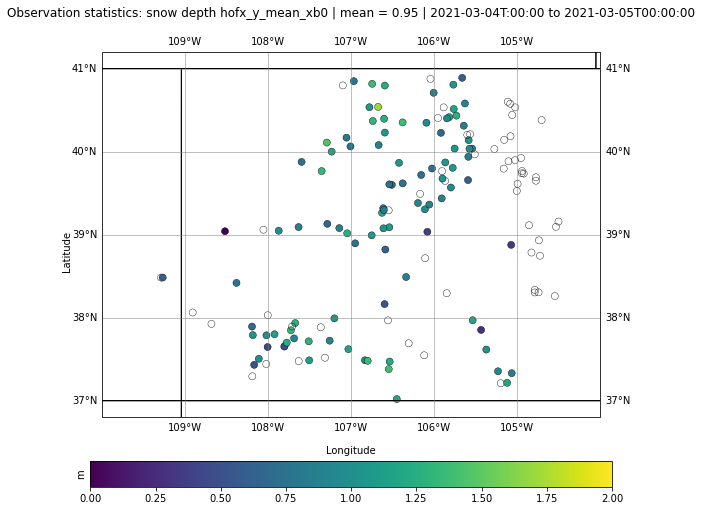

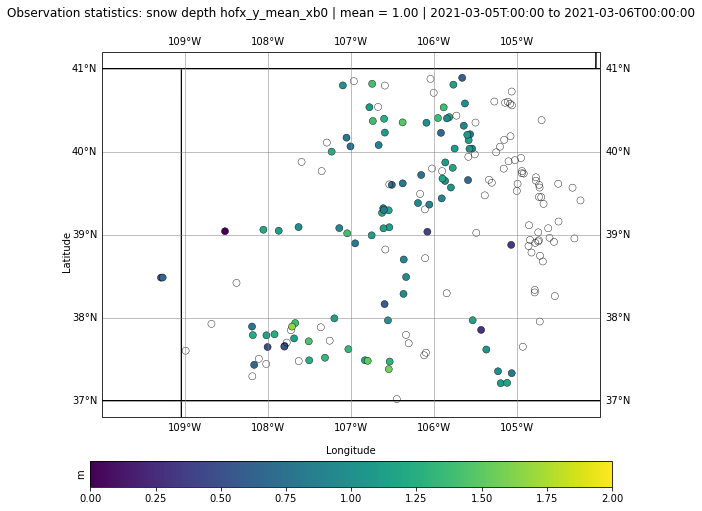

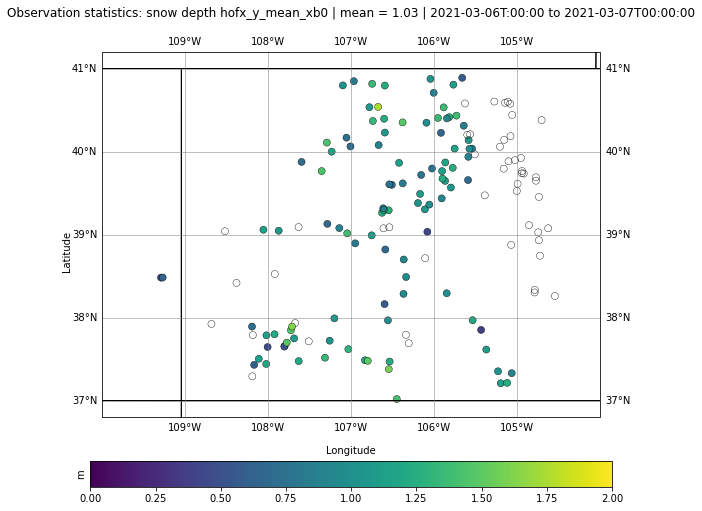

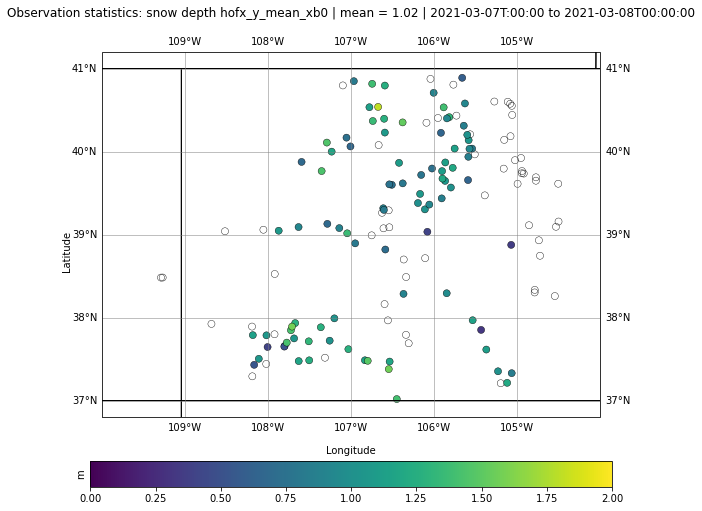

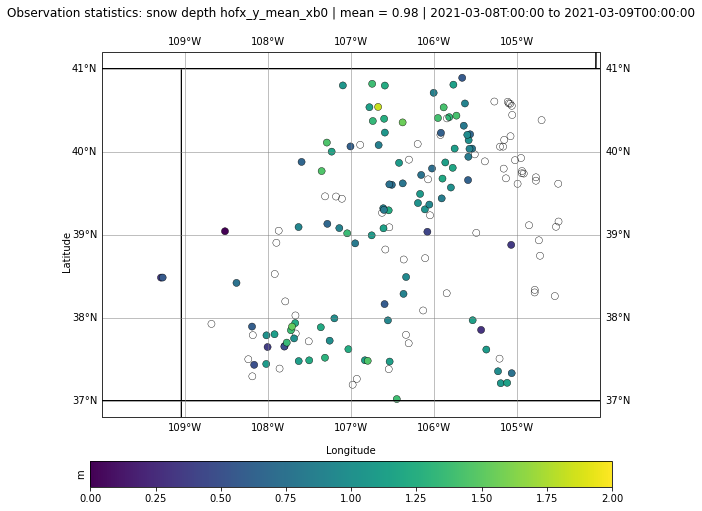

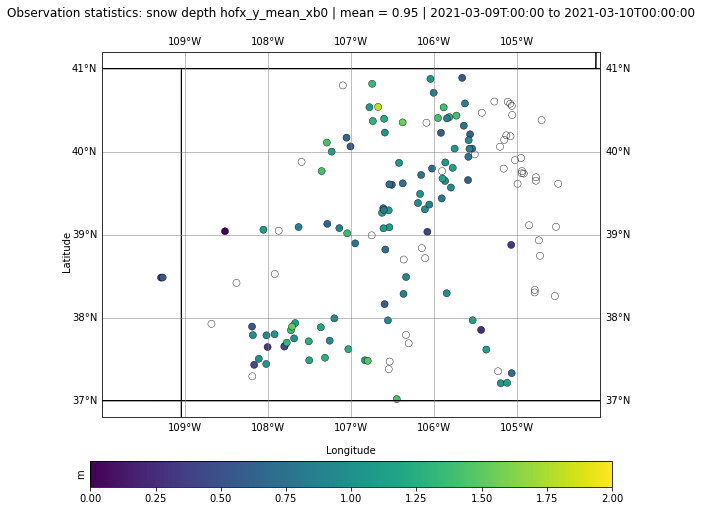

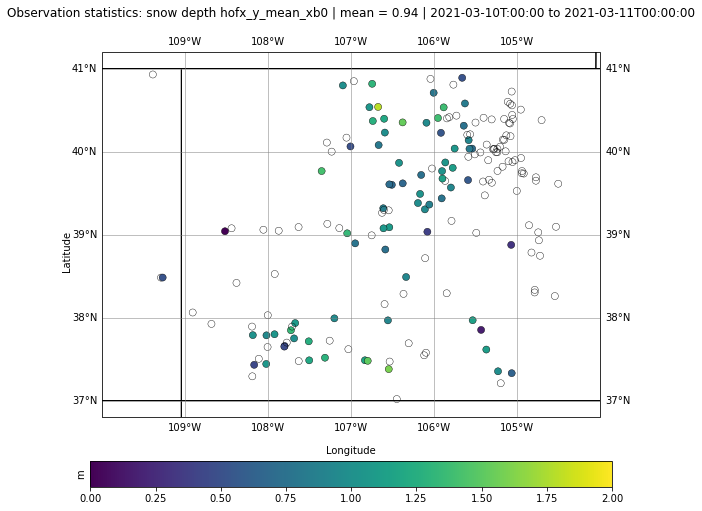

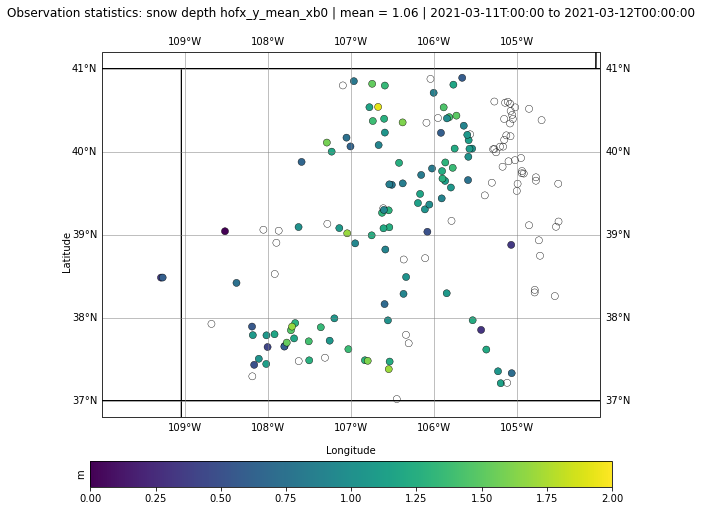

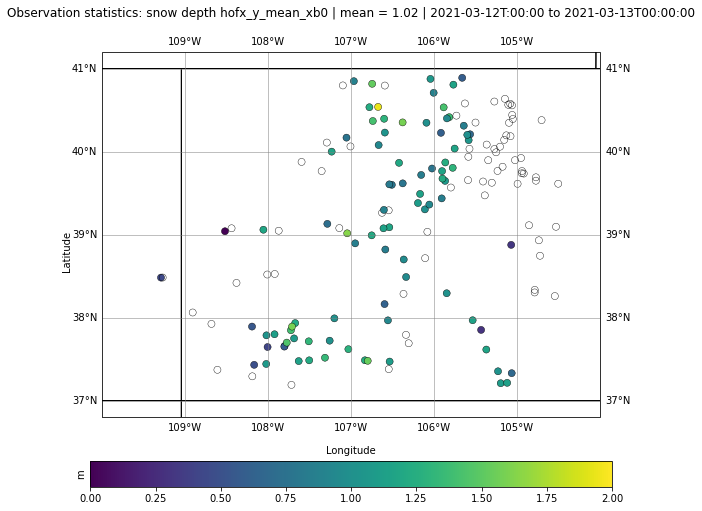

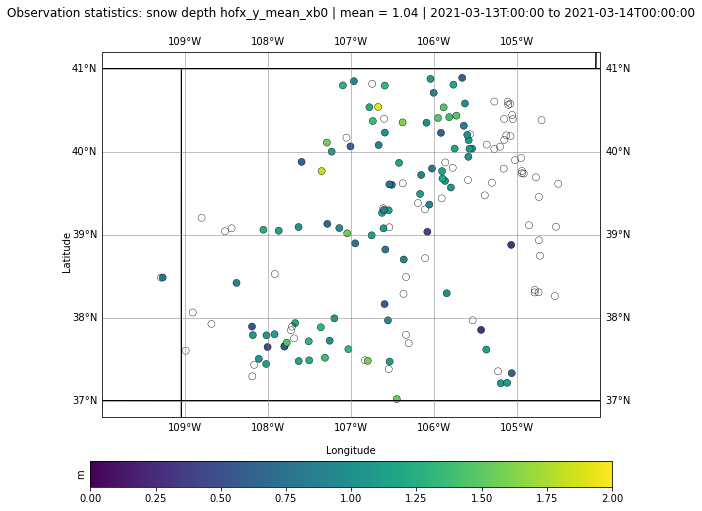

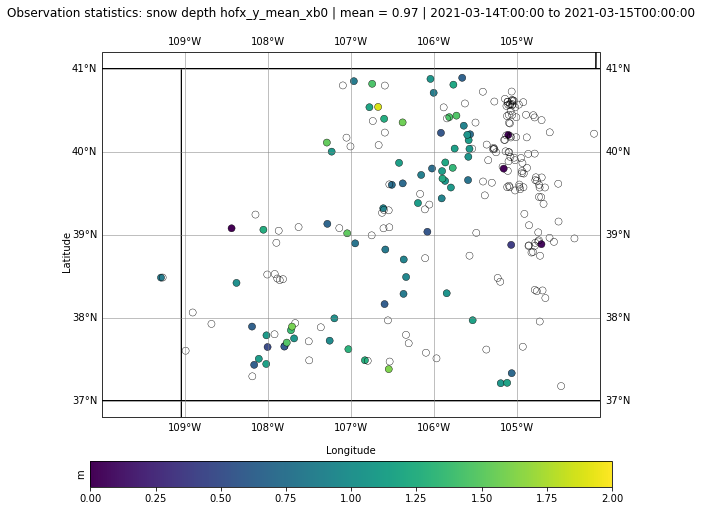

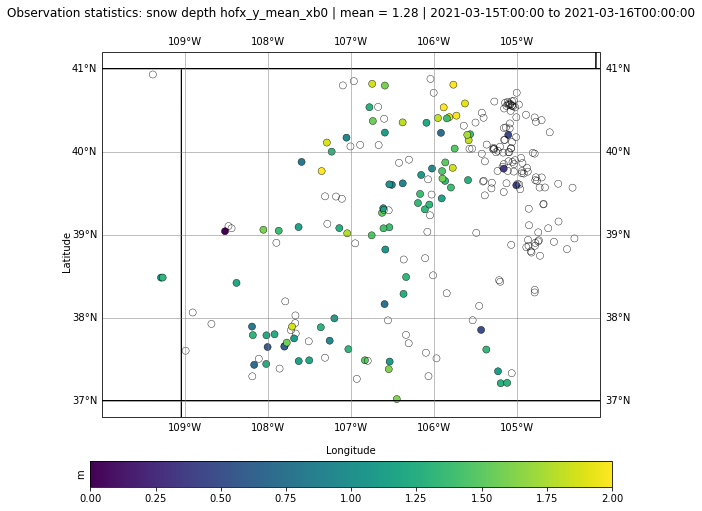

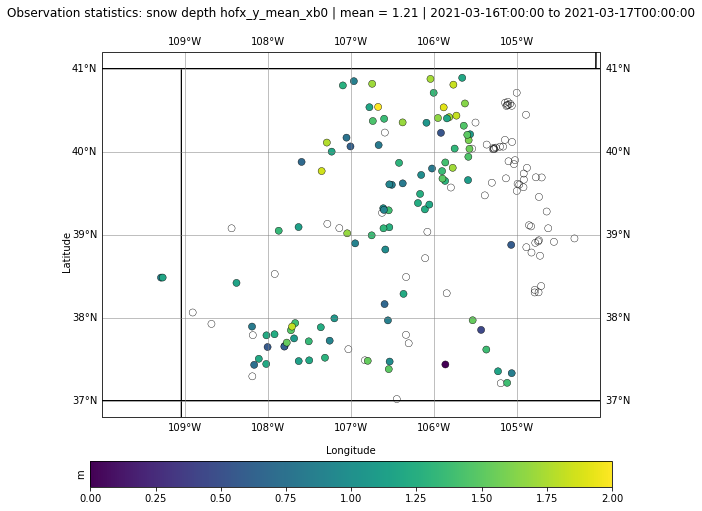

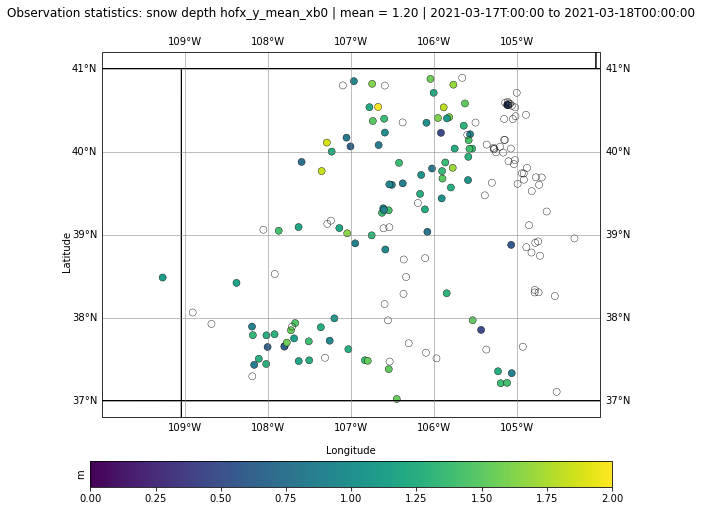

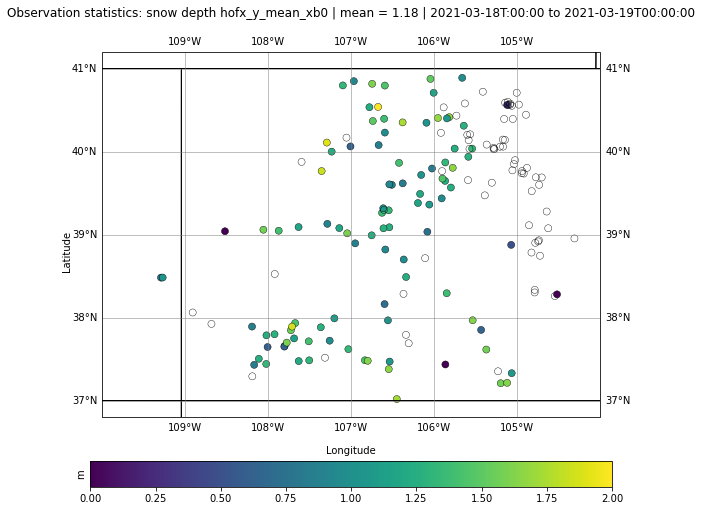

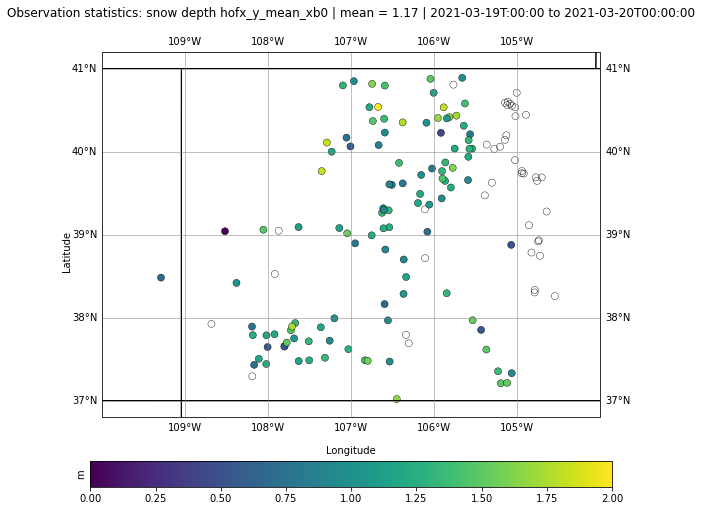

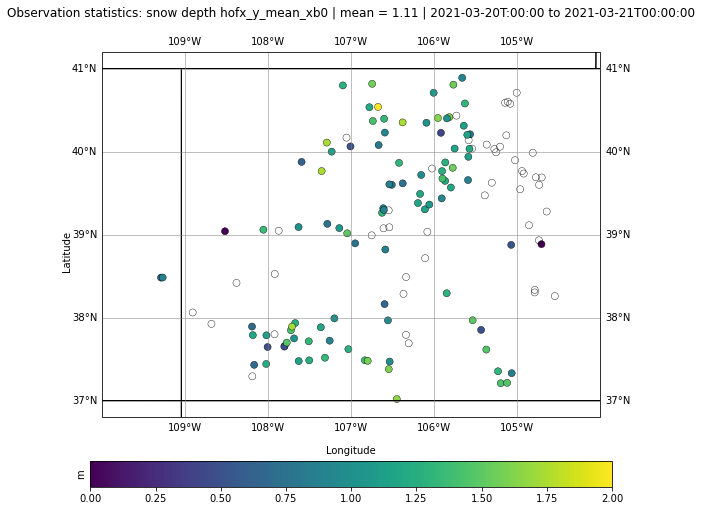

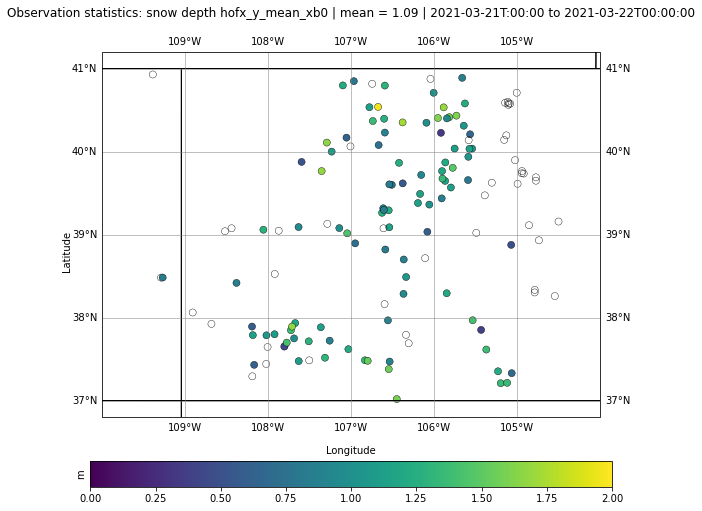

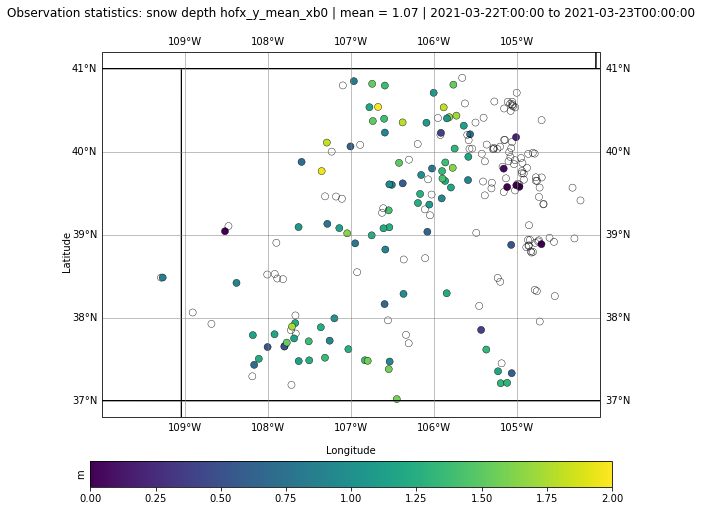

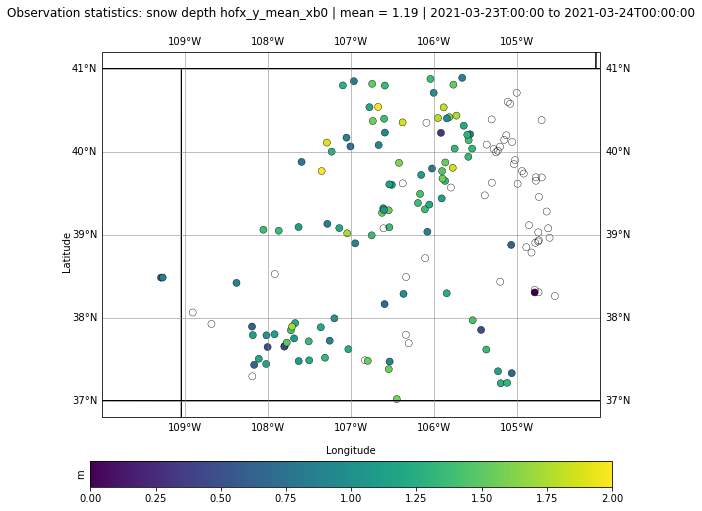

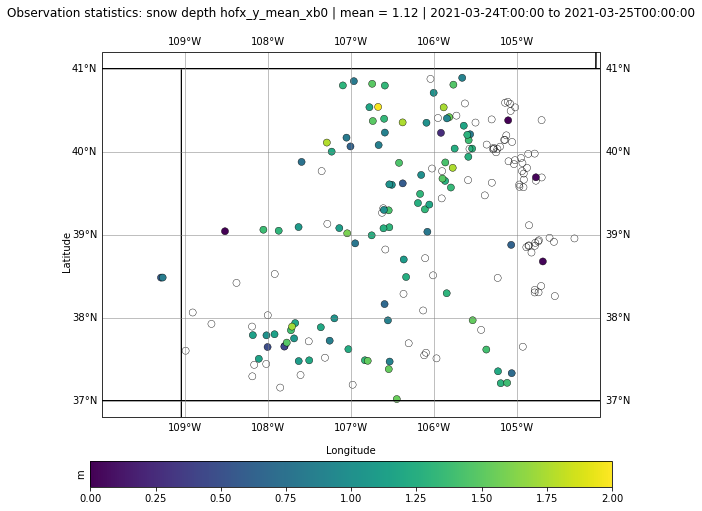

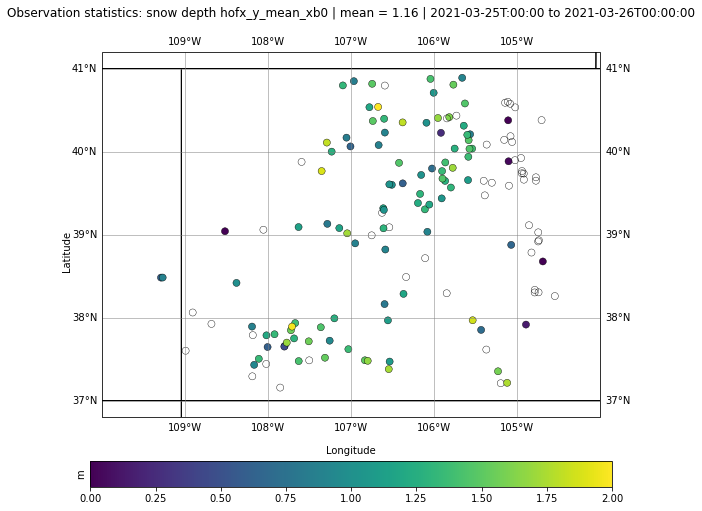

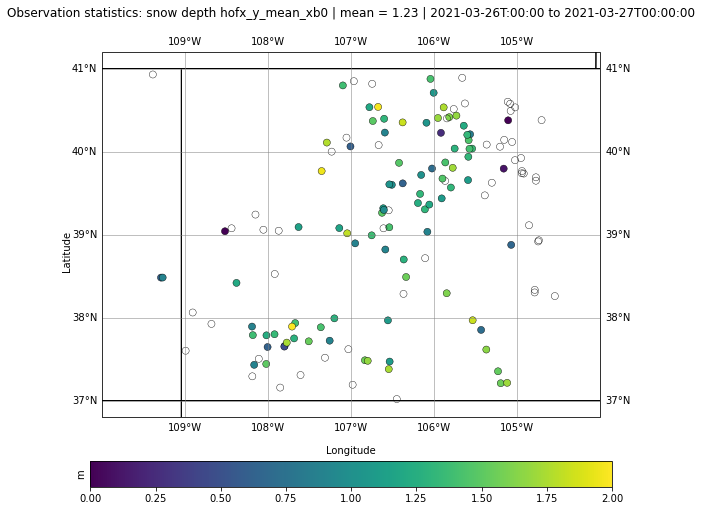

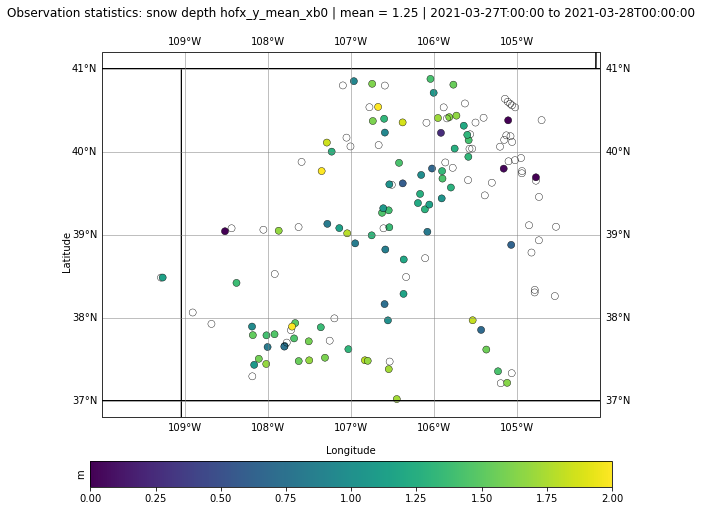

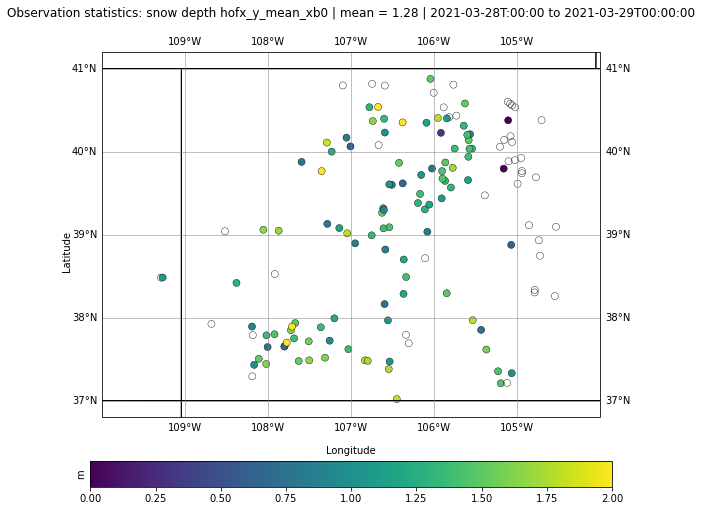

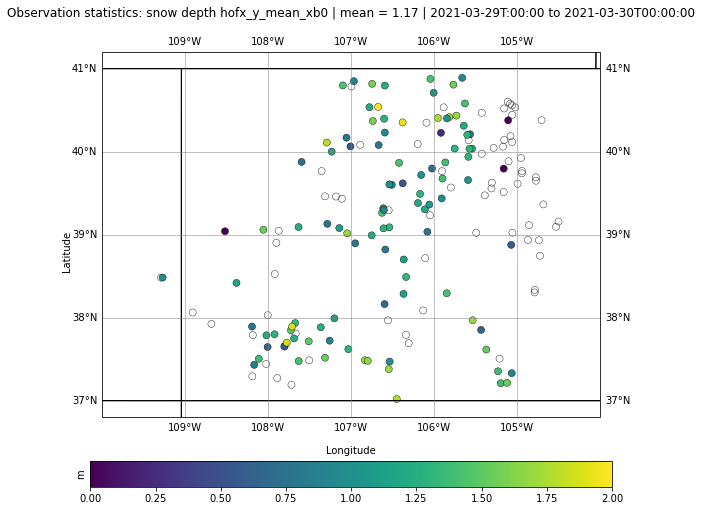

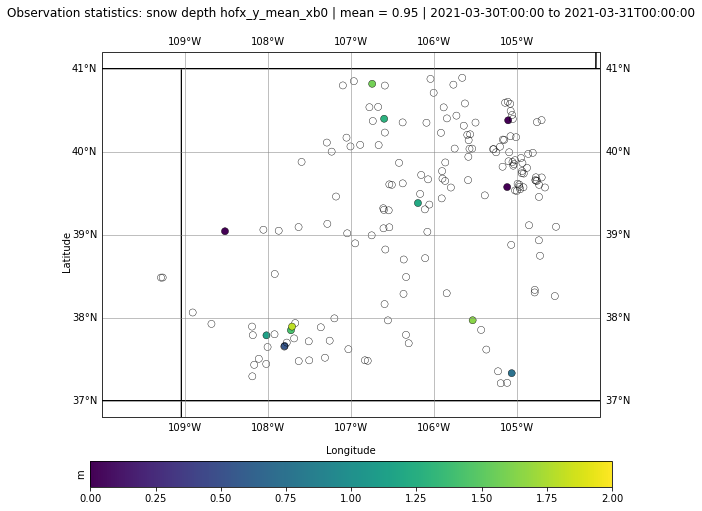

In [6]:

for startday in range (1, 32):

    endday = startday + 1
    startday = str(startday).zfill(2)
    endday = str(endday).zfill(2)

    hofx_file = os.path.join(exp_dir + '/' + 'jedi_letkf_out_obs_depth_2021-03-' + startday + 'T00:00:00Z_0000.nc')
    datetime = '2021-03-' + startday + 'T00:00:00'
    window_begin = '2021-03-' + startday + 'T:00:00'
    window_end = '2021-03-' + endday + 'T00:00:00'
    metric = 'hofx_y_mean_xb0' #'ObsValue'
    field = 'snow_depth'
    units = 'm'
    output_path = './figures/'
    plotformat = 'png'

    colmin = 0.0 #None
    colmax = 2.0 #None

    odat = []
    lons = []
    lats = []
    time = []

# Message file being read
    print(" Reading "+hofx_file)

# Open the file
    fh = netCDF4.Dataset(hofx_file)

   # if metric=='omb':
   #     odat_proc = fh.groups['ObsValue'].variables[field][:] - fh.groups['hofx'].variables[field][:]
   # else:
    odat_proc = fh.groups[metric].variables[field][:]

# Read metadata
    lons_proc = fh.groups['MetaData'].variables['longitude'][:]
    lats_proc = fh.groups['MetaData'].variables['latitude'][:]
    time_proc = fh.groups['MetaData'].variables['dateTime'][:]

    for m in range(len(odat_proc)):
        odat.append(odat_proc[m])
        lons.append(lons_proc[m])
        lats.append(lats_proc[m])

    fh.close()
# Figure filename
# ---------------
    field_savename = field

    savename = os.path.join(output_path, field_savename+"_"+metric+"_"+datetime+"."+plotformat)

# Set missing values to nans
    missing = 9.0e+30
    odat = np.where(np.abs(odat) < missing, odat, float("NaN"))
   
    numobs = len(odat)

    obarray = np.empty([numobs, 3])

    obarray[:, 0] = odat
    obarray[:, 1] = lons
    obarray[:, 2] = lats

# Exclude observations north of 50 degrees latitude
    obarray = obarray[obarray[:,2]<50.0]
    obarray = obarray[obarray[:,2]<41.0]
    obarray = obarray[obarray[:,2]>37.0]
    obarray = obarray[obarray[:,1]<-103.5]
    obarray = obarray[obarray[:,1]>-109.4]
    smallobs = obarray[:,0]<0.001
    #obarray[smallobs,0] = 0
# Compute and print some stats for the data
# -----------------------------------------
    stdev = np.nanstd(obarray[:, 0])  # Standard deviation
    omean = np.nanmean(obarray[:, 0]) # Mean of the data
    datmi = np.nanmin(obarray[:, 0])  # Min of the data
    datma = np.nanmax(obarray[:, 0])  # Max of the data

    print("Plotted data statistics: ")
    print("Mean: ", omean)
    print("Standard deviation: ", stdev)
    print("Minimum ", datmi)
    print("Maximum: ", datma)

    pmean = "{:.2f}".format(omean)
# Norm for scatter plot
# ---------------------
    norm = None


# Min max for colorbar
# --------------------
    if np.nanmin(obarray[:, 0]) < 0:
        cmax = datma
        cmin = datmi
        cmap_obs = 'RdBu'
    else:
        cmax = omean+stdev
        cmin = np.maximum(omean-stdev, 0.0)
        cmap_obs = 'viridis'

    if metric == 'PreQC' or metric == 'EffectiveQC':
        cmin = datmi
        cmax = datma

# If using omb then use standard deviation for the cmin/cmax
    if metric=='omb' or metric=='ombg' or metric=='oman':
        cmax = stdev
        cmin = -stdev
        cmax = datma
        cmin = datmi        

# Override with user chosen limits
    if (colmin!=None):
        print("Using user provided minimum for colorbar")
        cmin = colmin
    if (colmax!=None):
        print("Using user provided maximum for colorbar")
        cmax = colmax   
# Create figure
# -------------
    fig = plt.figure(figsize=(15, 8))

# initialize the plot pointing to the projection
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

# plot grid lines
    gl = ax.gridlines(crs=ccrs.PlateCarree(central_longitude=0), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='-')

    gl.xlabel_style = {'size': 10, 'color': 'black'}
    gl.ylabel_style = {'size': 10, 'color': 'black'}
#gl.xlocator = mticker.FixedLocator(
#    [-180, -135, -90, -45, 0, 45, 90, 135, 179.9])
    ax.set_ylabel("Latitude",  fontsize=7)
    ax.set_xlabel("Longitude", fontsize=7)

    ax.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)

# scatter data
    sc = ax.scatter(obarray[:, 1], obarray[:, 2],
                c=obarray[:, 0], s=50, linewidth=0.4, edgecolors='black',
                transform=ccrs.PlateCarree(), cmap=cmap_obs, vmin=cmin, vmax=cmax)   
# colorbar
    cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=.1, fraction=0.06,)
    if not units==None:
        cbar.ax.set_ylabel(units, fontsize=10)

# draw coastlines
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)

    ax.set_extent([-110, -104, 36.8, 41.2], crs=ccrs.PlateCarree())

# figure labels
    plt.title("Observation statistics: "+field.replace("_"," ")+" "+metric+" | mean = "+pmean+" | "+
            window_begin+" to "+window_end, y=1.08)
    ax.text(0.45, -0.1,   'Longitude', transform=ax.transAxes, ha='left')
    ax.text(-0.08, 0.4, 'Latitude', transform=ax.transAxes,
        rotation='vertical', va='bottom')
  

#    show plot
    savename = ('./pngs/hX_March21_'+datetime+'.png')
    print(" Saving figure as", savename, "\n")
    plt.savefig(savename, facecolor='w', dpi = 400)

In [ ]:
png_dir = './pngs'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.startswith('hX'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('./hx_March21_movie.gif', images, fps = 1)